### Regresi dengan Multi-Layer Perceptron (MLP)
**Bintang Kevin Hizkia Samosir**  
**Binus Graduate Program**


Anda diberikan file data_sin_noisy.csv di sini, yang berisi data sampel pasangan (x, y),
dimana x adalah input dan y target bernilai kontinu. Data tersebut dibangkitkan dari fungsi
sinus ditambah noise. Gunakan Python programming untuk membangun model regresi
dengan langkah sbb.:

#### **1. Preparasi data:**  
a. Lakukan normalisasi data.

Normalisasi data dilakukan dengan mengurangi nilai rata-rata dari setiap  variabel dan dibagi dengan standar deiasi

In [12]:
import numpy as np
import pandas as pd

data = pd.read_csv('../assets/data_sin_noisy.csv') 

x = data.iloc[:, 0]
y = data.iloc[:, 1]

x_normalized = (x - np.mean(x)) / np.std(x)
y_normalized = (y - np.mean(y)) / np.std(y)


b. Split data: bagilah data menjadi: training dataset (untuk membangun model) dan
test dataset dengan ratio 80:20.

Disini kita menyetel `test_size` 0.2 yang artinya 20% data akan digunakan sebagai test data. Juga kita mengatur `random_state` ke 42 supaya reproduksi pembagian data menjadi konsisten. Lalu kita print shape dari i x_train, y_train, x_test, dan y_test untuk memeriksa apakah pembagian data telah dilakukan dengan benar.

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalized.to_numpy(), y_normalized.to_numpy(), test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (79,)
y_train shape: (79,)
x_test shape: (20,)
y_test shape: (20,)


#### **2. Model regresi polinomial:**
a. Buatlah model regresi orde-1 sederhana, misalnya y = mx + c.

Karena menggunakan model regresi $y = mx + c$ maka kita akan menggunakan library `LinearRegression`

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()
# Transformasi dimensi x_train menjadi (n,1) agar dapat diterima metode fit()
reg.fit(x_train.reshape(-1, 1), y_train)


LinearRegression()

b. Bandingkan dengan model regresi polinomial non-linier orde-13.

Pertama kita akan membuat model nya terlebih dahulu

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Membuat model regresi polinomial orde 13
polyreg = make_pipeline(PolynomialFeatures(13), LinearRegression())
polyreg.fit(x_train.reshape(-1, 1), y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])

Lalu kita akan melakukan perbandingan dengan komparasi skor $R^2$ 

In [29]:
# Memperkirakan nilai y_test
y_pred = reg.predict(x_test.reshape(-1, 1))

# Memeriksa performa model regrsi
r2 = r2_score(y_test, y_pred)
print('R^2 score pada model regresi linier sederhana: ', r2)

# Melakukan prediksi dengan model regresi polinomial
y_pred_poly = polyreg.predict(x_test.reshape(-1, 1))

# Menghitung R^2 score pada model regresi polinomial
r2_poly = polyreg.score(x_test.reshape(-1, 1), y_test)
print('R^2 score pada model regresi polinomial orde-13: ', r2_poly)

R^2 score pada model regresi linier sederhana:  -0.0032893427917679574
R^2 score pada model regresi polinomial orde-13:  0.6080666753943256


Dari hasil perbandingan skor diatas, skor yang dimiliki model regresi polimonial orde-13 lebih baik karena lebih mendekati 1.

c. Plot data dan hasil regresi masing-masing.

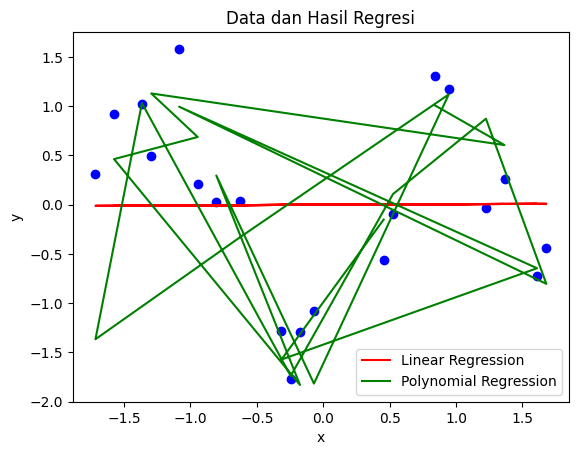

In [30]:
import matplotlib.pyplot as plt

# Membuat plot data
plt.scatter(x_test, y_test, color='blue')

# Membuat plot hasil regresi linier sederhana
plt.plot(x_test, y_pred, color='red', label='Linear Regression')

# Membuat plot hasil regresi polinomial orde-13
plt.plot(x_test, y_pred_poly, color='green', label='Polynomial Regression')

# Menambahkan judul dan label sumbu
plt.title('Data dan Hasil Regresi')
plt.xlabel('x')
plt.ylabel('y')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()


d. Evaluasi model masing-masing dengan menghitung nilai: bias, variance dan MSE.

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Menghitung MSE, bias, dan variance untuk model regresi linier sederhana
y_pred_train = reg.predict(x_train.reshape(-1, 1))
y_pred_test = reg.predict(x_test.reshape(-1, 1))

mse_linier = mean_squared_error(y_test, y_pred_test)
bias_linier = mean_absolute_error(y_test, y_pred_test)
variance_linier = np.var(y_pred_test)

# Menghitung MSE, bias, dan variance untuk model regresi polinomial orde-13
poly = PolynomialFeatures(degree=13)
x_poly = poly.fit_transform(x_train.reshape(-1, 1))

reg_poly = LinearRegression()
reg_poly.fit(x_poly, y_train)

y_pred_train_poly = reg_poly.predict(x_poly)
y_pred_test_poly = reg_poly.predict(poly.fit_transform(x_test.reshape(-1, 1)))

mse_poly = mean_squared_error(y_test, y_pred_test_poly)
bias_poly = mean_absolute_error(y_test, y_pred_test_poly)
variance_poly = np.var(y_pred_test_poly)

# Menampilkan hasil evaluasi model
print("Model regresi linier sederhana:")
print("MSE: ", mse_linier)
print("Bias: ", bias_linier)
print("Variance: ", variance_linier)

print("\nModel regresi polinomial orde-13:")
print("MSE: ", mse_poly)
print("Bias: ", bias_poly)
print("Variance: ", variance_poly)


Model regresi linier sederhana:
MSE:  0.8306135535762603
Bias:  0.7338186363152374
Variance:  4.008530168067577e-05

Model regresi polinomial orde-13:
MSE:  0.3244778127611826
Bias:  0.43608434705750626
Variance:  1.1258184494708618


**Penjelasan:**  
MSE: Nilai MSE model regresi polinomial orde-13 lebih baik karena memiliki nilai lebih kecil. Hal ini menunjukan bahwa model ini akan mampu memberikan prediksi yang lebih akurat  
Bias: Model regresi polinomial orde-13 memiliki nilai yang lebih kecil, artinya model ini memiliki peluang error prediksi yang lebih kecil  
Variance: Model regresi polinomial orde-13 memiliki nilai yang lebih kecil, artinya model ini mampu memberi hasil prediksi yang lebih stabil pada data-data baru.   

#### 3. Model regresi ANN: Buatlah model regresi dengan ANN arsitektur 1-3-1 dengan fungsi aktivasi ReLu. 
Bandingkan hasilnya dengan ANN arsitektur 1-3-3-1 dengan aktivasi Sigmoid. Evaluasi model masing-masing dengan menghitung nilai: bias, variance dan MSE.

- Membuat model regresi ANN dengan arsitektur 1-3-1 dengan fungsi aktivasi ReLu

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# membuat model sequential
modelRelu = Sequential()

# menambahkan layer input dan hidden layer dengan 3 neuron dan fungsi aktivasi ReLu
modelRelu.add(Dense(3, input_dim=1, activation='relu'))

# menambahkan output layer dengan 1 neuron
modelRelu.add(Dense(1))

# mengkompilasi model dengan optimizer 'adam' dan loss function 'mean_squared_error'
modelRelu.compile(optimizer='adam', loss='mean_squared_error')


- Membuat model regresi ANN dengan arsitektur 1-3-3-1 dengan fungsi aktivasi Sigmoiod

In [40]:

# membuat model sequential
modelSigmoid = Sequential()

# menambahkan layer input dan hidden layer dengan 3 neuron dan fungsi aktivasi ReLu
modelSigmoid.add(Dense(3, input_dim=1, activation='sigmoid'))
modelSigmoid.add(Dense(3, activation='sigmoid'))

# menambahkan output layer dengan 1 neuron
modelSigmoid.add(Dense(1))

# mengkompilasi model dengan optimizer 'adam' dan loss function 'mean_squared_error'
modelSigmoid.compile(optimizer='adam', loss='mean_squared_error')


- Evaluasi model masing-masing dengan menghitung nilai: bias, variance dan MSE.

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# fungsi untuk menghitung nilai bias dan variance
def bias_variance(y_true, y_pred):
    avg_y = np.mean(y_true)
    avg_pred = np.mean(y_pred)
    bias = np.mean((y_true - avg_pred) ** 2)
    variance = np.mean((y_pred - avg_pred) ** 2)
    return bias, variance

# model ANN arsitektur 1-3-1 dengan ReLu
y_pred_ann_relu = modelRelu.predict(x_test)
mse_ann_relu = mean_squared_error(y_test, y_pred_ann_relu)
mae_ann_relu = mean_absolute_error(y_test, y_pred_ann_relu)
bias_ann_relu, var_ann_relu = bias_variance(y_test, y_pred_ann_relu)

# model ANN arsitektur 1-3-3-1 dengan Sigmoid
y_pred_ann_sigmoid = modelSigmoid.predict(x_test)
mse_ann_sigmoid = mean_squared_error(y_test, y_pred_ann_sigmoid)
mae_ann_sigmoid = mean_absolute_error(y_test, y_pred_ann_sigmoid)
bias_ann_sigmoid, var_ann_sigmoid = bias_variance(y_test, y_pred_ann_sigmoid)

# print hasil evaluasi
print("\nMSE ANN arsitektur 1-3-1 dengan ReLu:", mse_ann_relu)
print("MSE ANN arsitektur 1-3-3-1 dengan Sigmoid:", mse_ann_sigmoid)

print("\nMAE ANN arsitektur 1-3-1 dengan ReLu:", mae_ann_relu)
print("MAE ANN arsitektur 1-3-3-1 dengan Sigmoid:", mae_ann_sigmoid)

print("\nBias ANN arsitektur 1-3-1 dengan ReLu:", bias_ann_relu)
print("Bias ANN arsitektur 1-3-3-1 dengan Sigmoid:", bias_ann_sigmoid)

print("\nVariance ANN arsitektur 1-3-1 dengan ReLu:", var_ann_relu)
print("Variance ANN arsitektur 1-3-3-1 dengan Sigmoid:", var_ann_sigmoid)


1/1 [==============================] - 0s 12ms/step

MSE ANN arsitektur 1-3-1 dengan ReLu: 0.8284588955801416
MSE ANN arsitektur 1-3-3-1 dengan Sigmoid: 0.8172558564537491

MAE ANN arsitektur 1-3-1 dengan ReLu: 0.7391580833932745
MAE ANN arsitektur 1-3-3-1 dengan Sigmoid: 0.721806170884457

Bias ANN arsitektur 1-3-1 dengan ReLu: 0.8286946322705523
Bias ANN arsitektur 1-3-3-1 dengan Sigmoid: 0.8289007334018518

Variance ANN arsitektur 1-3-1 dengan ReLu: 0.0019501693
Variance ANN arsitektur 1-3-3-1 dengan Sigmoid: 0.0008529244


Berdasarkan nilai hasil performance metrics diatas, dan dengan kembali menggunakan penjelasan di soal sebelumnya (karena metrik nya sama), dengan ini dapat disimpulkan bahwa model ANN dengan arsitektur 1-3-3-1 dengan fungsi aktivasi Sigmoid adalah model regresi yang lebih baik.